## Import packages ##

In [26]:
import numpy as np
import seaborn as sns
sns.set(context='talk', style='ticks')
import matplotlib.pyplot as plt

import lab3
from lab3.experiment.group import ExperimentGroup
from lab3.analysis.basic.psth import PSTH
from lab3.plotting.utils import wide2long

## Define analysis ##

In [4]:
PSTH.constructor_ids

['pre', 'post', 'dt']

In [5]:
psth_strategy = PSTH(pre=3, post=3, dt=0.1)

In [6]:
psth_strategy

PSTH,-1 days +23:59:57,-1 days +23:59:57.100000,-1 days +23:59:57.200000,-1 days +23:59:57.300000,-1 days +23:59:57.400000,-1 days +23:59:57.500000,-1 days +23:59:57.600000,-1 days +23:59:57.700000,-1 days +23:59:57.800000,-1 days +23:59:57.900000,...,0 days 00:00:02.100000,0 days 00:00:02.200000,0 days 00:00:02.300000,0 days 00:00:02.400000,0 days 00:00:02.500000,0 days 00:00:02.600000,0 days 00:00:02.700000,0 days 00:00:02.800000,0 days 00:00:02.900000,0 days 00:00:03


## Build experiment group ##

In [7]:
trial_ids = [27738, 28610, 28617] 

grp = ExperimentGroup.from_trial_ids(trial_ids)

In [8]:
grp.to_cohort()

,
Mouse,ImagingExperiment
aac22,27738
aac31,28610
aac33,28617


In [9]:
cohort = grp.to_cohort()

## Apply analysis to dataset ##

Here we will compute a running PSTH. We have to define a type of event to trigger the PSTH on. For simplicity, we will perform a running-start PSTH

In [11]:
event_spec = {
    "signal_type": "behavior", # category of events (behavior, imaging, or LFP)
    "event_type": "running", # name of event
    "as_time_events": True # return events as frames or times. PSTH requires times. 
}

View the running events for this experiment

In [12]:
expt = grp[0]

print("Experiment:")
print(expt)
expt.events(**event_spec)

Experiment:
ImagingExperiment(trial_id=27738, mouse_id=aac22, expt_type=RF_noLED, 
                  start_time=2020-07-15 12:01:46)


""
IntervalEvent
"(4.217724, 8.87061)"
"(9.104928, 21.356412)"
"(24.335597999999997, 25.875401999999998)"
"(30.427865999999998, 37.825619999999994)"
"(41.273441999999996, 43.549673999999996)"
...
"(1130.41698, 1140.29181)"
"(1145.245962, 1151.2043339999998)"
"(1159.2380939999998, 1169.6819819999998)"


Analysis objects are versatile: the same analysis can be run on different signal types and sets of ROIs. These are specified with the `signal_spec` dictionary at runtime 

In [35]:
signal_spec = {
    'signal_type': 'dfof', # raw, dfof, or spike
    'label': 'PYR' # labels you saved
}

In [13]:
psths = cohort.apply(psth_strategy, events=event_spec, signal_spec=signal_spec)

/home/zhenrui/code/lab3/lab3/core/helpers.py:79: UserWarning: The Analysis `PSTH` is not type-annotated (consider adding annotations to allow type-checking)
  warnings.warn(f"The Analysis `{name}` is not type-annotated "


In [36]:
psths

PSTH                                                                    -1 days +23:59:57  \
Mouse ImagingExperiment IntervalEvent                   roi_label                           
aac22 27738             (4.217724, 8.87061)             0000-0010-0095           0.251184   
                                                        0000-0010-0166           0.053539   
                                                        0000-0010-0377           0.019776   
                                                        0000-0010-0453           0.032016   
                                                        0000-0011-0122           0.548273   
...                                                                                   ...   
aac33 28617             (872.9349719999999, 886.358046) 0000-0494-0388           0.015926   
                                                        0000-0497-0150           0.203705   
                                                        0000-0499-0168           0.120359   
                                                        0000-0499-0202          -0.013770   
                                                        0000-0500-0420           0.275780   

PSTH                                                                    -1 days +23:59:57.100000  \
Mouse ImagingExperiment IntervalEvent                   roi_label                                  
aac22 27738             (4.217724, 8.87061)             0000-0010-0095                  0.146579   
                                                        0000-0010-0166                  0.125541   
                                                        0000-0010-0377                  0.426676   
                                                        0000-0010-0453                  0.110208   
                                                        0000-0011-0122                  0.319677   
...                                                                                          ...   
aac33 28617             (872.9349719999999, 886.358046) 0000-0494-0388                  0.161687   
                                                        0000-0497-0150                  0.083406   
                                                        0000-0499-0168                  0.066316   
                                                        0000-0499-0202                  0.427008   
                                                        0000-0500-0420                  0.409212   

PSTH                                                                    -1 days +23:59:57.200000  \
Mouse ImagingExperiment IntervalEvent                   roi_label                                  
aac22 27738             (4.217724, 8.87061)             0000-0010-0095                 -0.012646   
                                                        0000-0010-0166                  0.126146   
                                                        0000-0010-0377                  0.098173   
                                                        0000-0010-0453                 -0.095247   
                                                        0000-0011-0122                  0.293170   
...                                                                                          ...   
aac33 28617             (872.9349719999999, 886.358046) 0000-0494-0388                  0.049320   
                                                        0000-0497-0150                  0.119498   
                                                        0000-0499-0168                 -0.019523   
                                                        0000-0499-0202                  0.102262   
                                                        0000-0500-0420                  0.150884   

PSTH                                                                    -1 days +23:59:57.300000  \
Mouse ImagingExperiment IntervalEvent                   roi_label                       

Compute mean PSTH of each cell over running onsets

In [15]:
mean_psth = psths.groupby(["Mouse", "ImagingExperiment", "roi_label"]).agg("mean")
mean_psth

PSTH                                    -1 days +23:59:57  \
Mouse ImagingExperiment roi_label                           
aac22 27738             0000-0010-0095           0.252029   
                        0000-0010-0166           0.160258   
                        0000-0010-0377           0.124721   
                        0000-0010-0453           0.077793   
                        0000-0011-0122           0.143226   
...                                                   ...   
aac33 28617             0000-0494-0388           0.036459   
                        0000-0497-0150           0.180546   
                        0000-0499-0168           0.273173   
                        0000-0499-0202           0.283226   
                        0000-0500-0420           0.106321   

PSTH                                    -1 days +23:59:57.100000  \
Mouse ImagingExperiment roi_label                                  
aac22 27738             0000-0010-0095                  0.231950   
                        0000-0010-0166                  0.141422   
                        0000-0010-0377                  0.137595   
                        0000-0010-0453                  0.050182   
                        0000-0011-0122                  0.157833   
...                                                          ...   
aac33 28617             0000-0494-0388                  0.080112   
                        0000-0497-0150                  0.160722   
                        0000-0499-0168                  0.299786   
                        0000-0499-0202                  0.277883   
                        0000-0500-0420                  0.129124   

PSTH                                    -1 days +23:59:57.200000  \
Mouse ImagingExperiment roi_label                                  
aac22 27738             0000-0010-0095                  0.250648   
                        0000-0010-0166                  0.148349   
                        0000-0010-0377                  0.148700   
                        0000-0010-0453                  0.068257   
                        0000-0011-0122                  0.152772   
...                                                          ...   
aac33 28617             0000-0494-0388                  0.075804   
                        0000-0497-0150                  0.160571   
                        0000-0499-0168                  0.225690   
                        0000-0499-0202                  0.239460   
                        0000-0500-0420                  0.107604   

PSTH                                    -1 days +23:59:57.300000  \
Mouse ImagingExperiment roi_label                                  
aac22 27738             0000-0010-0095                  0.272440   
                        0000-0010-0166                  0.128131   
                        0000-0010-0377                  0.152130   
                        0000-0010-0453                  0.078896   
                        0000-0011-0122                  0.163641   
...                                                          ...   
aac33 28617             0000-0494-0388                  0.058250   
                        0000-0497-0150                  0.113913   
                        0000-0499-0168                  0.187691   
                        0000-0499-0202                  0.269244   
                        0000-0500-0420                  0.111833   

PSTH                                    -1 days +23:59:57.400000  \
Mouse ImagingExperiment roi_label                                  
aac22 27738             0000-0010-0095                  0.240694   
                        0000-0010-0166                  0.138656   
                        0000-0010-0377                  0.125945   
                        0000-0010-0453                  0.060762   
                        0000-0011-0122                  0.172824   
...                                                          ...   
aac33 2

## Plot analyzed data ##

In [17]:
long_df = wide2long(mean_psth)
long_df['PSTH'] = long_df['PSTH'].map(lambda x: x.total_seconds())

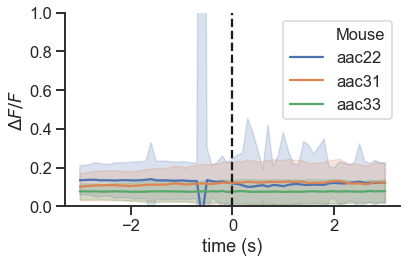

In [34]:
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(data=long_df, x="PSTH", y='activity', hue='Mouse', ci='sd', ax=ax)

# Play with figure aesthetics
sns.despine()
ax.set_ylim([0, 1])
ax.set_ylabel(r"$\Delta F/F$")
ax.set_xlabel("time (s)")
ax.axvline(0, ls='--', c='k')

fig.tight_layout()